# Taller

Responder las preguntas de analítica acerca de la base de datos de IMDB que se encuentran a lo largo de este documento. Modifique el nombre de este archivo por el número de su documento (123456789.ipynb) y adjúntelo como parte de los entregables del taller.

Nombre: Daniel Pineda Vélez



### Descargar los datos:
- Tabla de películas
- Archivo .shp y archivos auxiliares con la información necesaria para pintar el mapa

Estos archivos quedarán en la carpeta _/content/IMDBAnalyticsData/_ asociada con el sistema operativo del servidor en el que se está ejecutando google colab. 

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr' -O data
!unzip "/content/data" -d "/content/IMDBAnalyticsData/"


--2023-03-02 15:39:39--  https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr
Resolving docs.google.com (docs.google.com)... 173.194.194.102, 173.194.194.101, 173.194.194.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8s288r4qgjub1id7n9vr0oaa6nefatkn/1677771525000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=b4929de1-db3d-4e2f-8a04-105b3160eabf [following]
--2023-03-02 15:39:42--  https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8s288r4qgjub1id7n9vr0oaa6nefatkn/1677771525000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=b4929de1-db3d-4e2f-8a04-105b3160eabf
Resolving doc-14-6c-docs.googleusercontent.com (doc-14-6c-docs.googleusercontent.com)... 142.251.6.132, 2607:f8


### Importar las librerías necesarias

La libreia geopandas, que sirve para el procesamiento de archivos con información geográfica (shapefiles) no está instalada por defecto en el ambiente de google colab. Por esta razón, debe instalarla

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 97.0 MB/s eta 0:00:00


In [40]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### Información básica de la tabla de películas

In [4]:
df = pd.read_csv('IMDBAnalyticsData/Data/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Pregunta 1**

Utilice histogramas para comparar la distribución de la columna _imdb_score_ relacionada con películas producidas en Francia y Canadá.

Para crear el histograma:

- Ajuste el número de _bins_ a 20
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

In [11]:
df_Canada = df[df['country'] == "Canada"]
df_Canada

df_Francia = df[df['country'] == "France"]
df_Francia

hist_Canada = px.histogram(df_Canada, x="imdb_score",nbins=20,labels={'duration':'Time [mins] '})
hist_Canada.show()

hist_Francia = px.histogram(df_Francia, x="imdb_score",nbins=20,labels={'duration':'Time [mins] '})
hist_Francia.show()


**Pregunta 2**

Cree un histograma para mirar la distribución de la columna _imdb_score_ de las películas producidas en blanco y negro.

Para crear el histograma:

- Ajuste el número de _bins_ a 10
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

In [20]:
df_Blanco_Negro = df[df['color'] == " Black and White"]
df_Blanco_Negro

hist_Blanco_Negro = px.histogram(df_Blanco_Negro, x="imdb_score",nbins=10,labels={'duration':'Time [mins] '})
hist_Blanco_Negro

**Pregunta 3**

¿Qué país tiene el mayor promedio de calificación de películas? Utilice figuras de barras para visualizar los resultados.  



country
Afghanistan             7.400000
Argentina               7.500000
Aruba                   4.800000
Australia               6.514545
Bahamas                 4.400000
                          ...   
Turkey                  6.000000
UK                      6.818304
USA                     6.367428
United Arab Emirates    8.200000
West Germany            7.266667
Name: imdb_score, Length: 65, dtype: float64
El país con promedio mas alto de películas producidas fue Kyrgyzstan con un rating de 8.7 por película
El país con promedio mas bajo de películas producidas fue Bahamas con un rating de 4.4 película


Text(0, 0.5, 'Promedio por película')

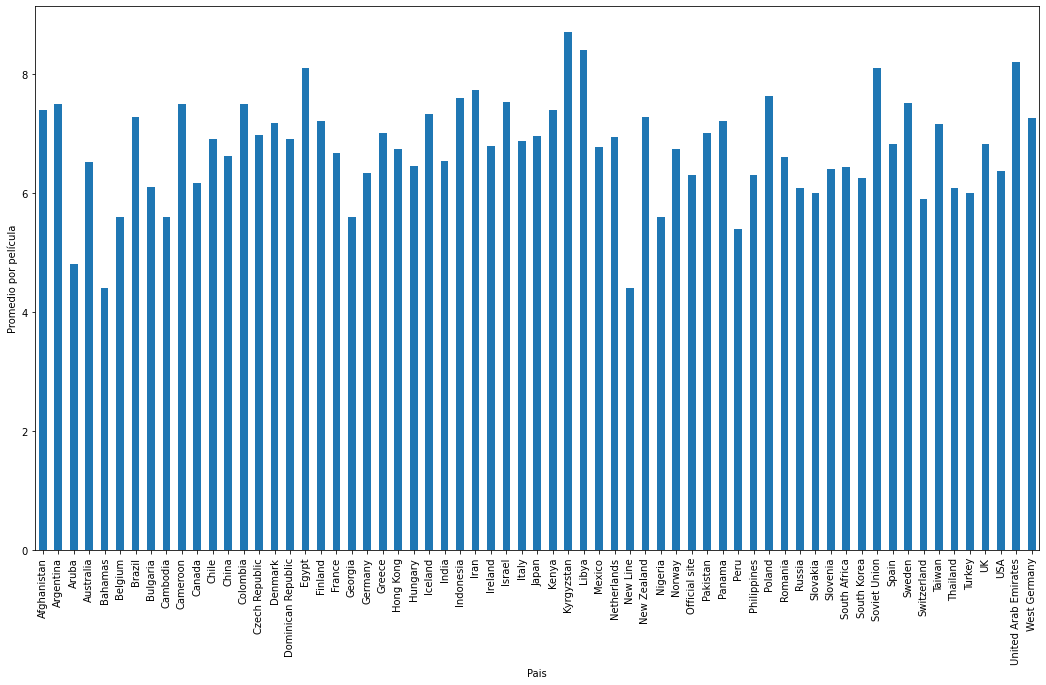

In [30]:
pais_imdb = df.groupby('country')['imdb_score'].mean()
print(count_per_year)
print(f"El país con promedio mas alto de películas producidas fue {count_per_year.idxmax()} con un rating de {count_per_year.max()} por película")
print(f"El país con promedio mas bajo de películas producidas fue {count_per_year.idxmin()} con un rating de {count_per_year.min()} película")

ax = pais_imdb.plot.bar(figsize = (18,10))
ax.set_xlabel('Pais')
ax.set_ylabel('Promedio por película')

**Pregunta 4** 

¿Cuántas películas a blanco y negro y cuántas películas a color se tienen en la base de datos?


In [32]:
movies_blanco_negro = df[df['color'] == ' Black and White']
num_movies_blanco_negro = len(movies_blanco_negro)

print(f"Se producieron {num_black_and_white_movies} películas en blanco y negro")

movies_color = df[df['color'] == 'Color']
num_movies_color = len(color)

print(f"Se producieron {num_color} películas a color")

Se producieron 209 películas en blanco y negro
Se producieron 4815 películas a color


**Pregunta 5**

¿Cuál película de Christopher Nolan tiene la mayor calificación (_imdb_score_)? Utilice figuras de barras para visualizar los resultados.

**Pregunta 6**

Utilice un _line chart_ para visualizar cuántas películas se produjeron en USA desde el 2010 hasta el 2015.

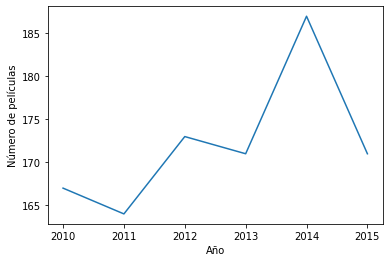

In [50]:
movies_USA = df[(df['country'] == 'USA') & (df['title_year'] >= 2010) & (df['title_year'] <= 2015)]


movies_per_year = movies_USA['title_year'].value_counts().sort_index()

# Crear el line chart
plt.plot(movies_per_year.index, movies_per_year.values)
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.show()

**Pregunta 7**

Grafique en un mapa el _imdb_score_ promedio de las películas producidas en cada país.

In [ ]:
#Espacio para el código de la pregunta 7

**Pregunta 8**

¿Qué información de su proyecto podría utilizar para hacer analítica de datos?


En mi proyecto(Einshot) podríamos utilizar los cockteles mas pedidos para crear promociones en el bar, o tambien podemos relacionar esta informacion anteior  con la eadad para saber que cockteles quitar de la carta o tambien subirle el precio 